In [4]:
import matplotlib.pyplot as plt
import json
import os

dict_keys(['', 'Seed', 'T', 'Num Samples', 'Valid', 'Unique', 'Novel', 'QED Mean', 'QED 25%ile', 'QED Median', 'QED 75%ile', 'Novel QED Mean', 'Novel QED 25%ile', 'Novel QED Median', 'Novel QED 75%ile', 'Method', 'Condition', 'Gamma', 'Schedule'])
dict_keys(['', 'Seed', 'T', 'Num Samples', 'Valid', 'Unique', 'Novel', 'QED Mean', 'QED 25%ile', 'QED Median', 'QED 75%ile', 'Novel QED Mean', 'Novel QED 25%ile', 'Novel QED Median', 'Novel QED 75%ile', 'Method', 'Condition', 'Gamma', 'Schedule'])
dict_keys(['', 'Seed', 'T', 'Num Samples', 'Valid', 'Unique', 'Novel', 'QED Mean', 'QED 25%ile', 'QED Median', 'QED 75%ile', 'Novel QED Mean', 'Novel QED 25%ile', 'Novel QED Median', 'Novel QED 75%ile', 'Method', 'Condition', 'Gamma', 'Schedule'])
dict_keys(['', 'Seed', 'T', 'Num Samples', 'Valid', 'Unique', 'Novel', 'QED Mean', 'QED 25%ile', 'QED Median', 'QED 75%ile', 'Novel QED Mean', 'Novel QED 25%ile', 'Novel QED Median', 'Novel QED 75%ile', 'Method', 'Condition', 'Gamma', 'Schedule'])
dict_key

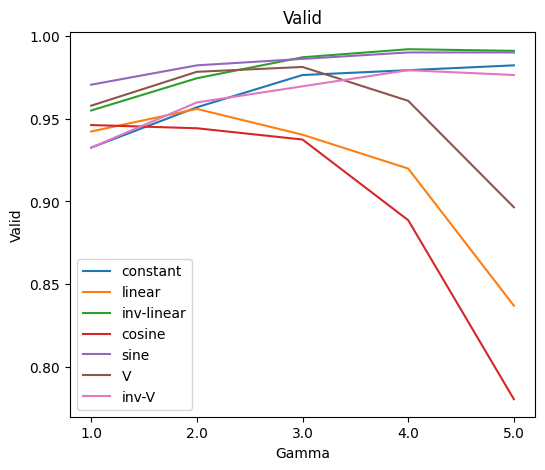

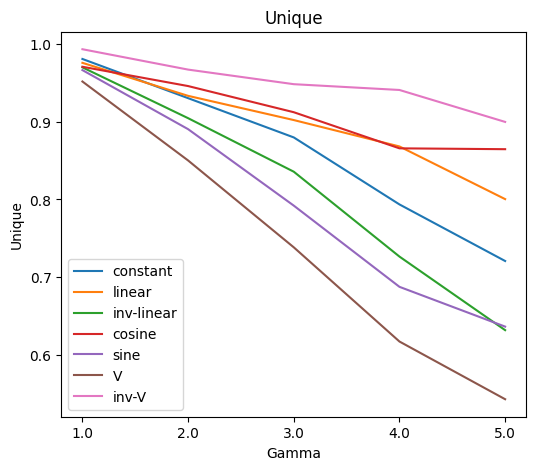

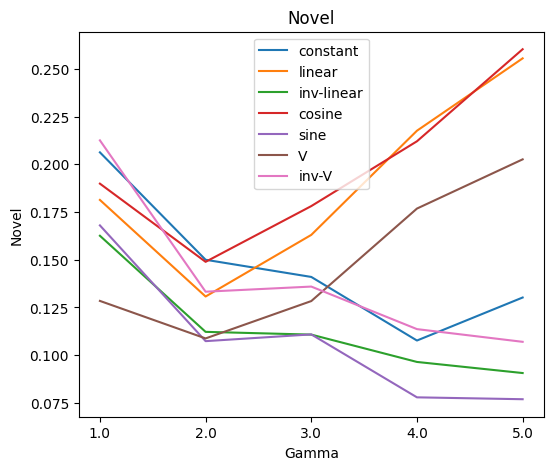

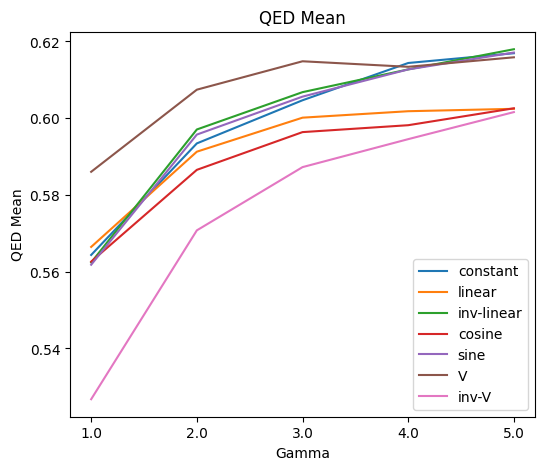

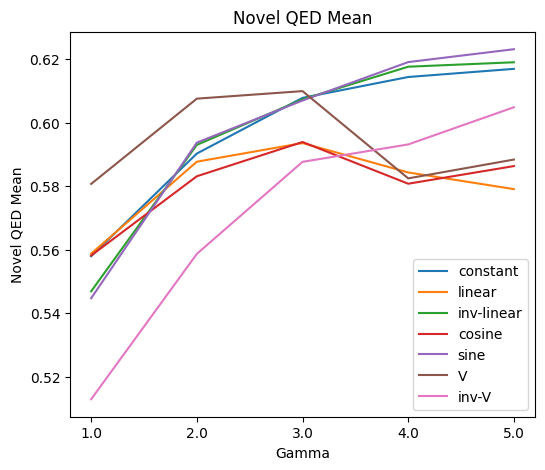

In [5]:
folder = './grid_search_qed'

# Initialize figures
relevant_keys = ['Valid', 'Unique', 'Novel', 'RING_COUNT Mean', 'Novel RING_COUNT Mean', 'QED Mean', 'Novel QED Mean']
plts_dict = {}
for file in os.listdir(folder):
    with open(os.path.join(folder, file), 'r') as f:
        data = json.load(f)
    print(data.keys())
    
    for key, value in data.items():
        if key not in relevant_keys:
            continue
        if key not in plts_dict:
            plts_dict[key] = plt.subplots(1,1, figsize=(6, 5))
        plt_data = [float(x) for x in data[key]]
        plts_dict[key][1].plot(data['Gamma'], plt_data, label=data['Schedule'][0])
        plts_dict[key][1].legend()
        plts_dict[key][1].set_title(key)
        plts_dict[key][1].set_xlabel('Gamma')
        plts_dict[key][1].set_ylabel(key)
        plts_dict[key][1].set_title(key)


Guidance-schedule: inv-V, strength:  1.00: 100%|██████████| 7/7 [00:00<00:00, 409.98it/s]


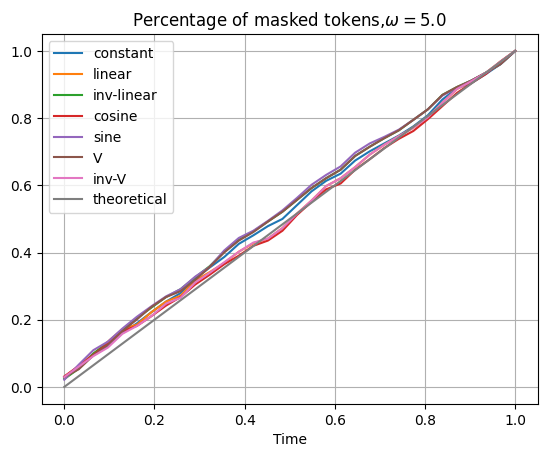

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

schedules = ['constant', 'linear', 'inv-linear', 'cosine', 'sine', 'V', 'inv-V']
strengths = np.linspace(1.0, 5.0, 5)
pbar = tqdm(schedules)
stats = {}
times = np.linspace(1.0,0.0,32)
for strength in strengths:
    plt.clf()
    for schedule in pbar:
        pbar.set_description(f'Guidance-schedule: {schedule}, strength: {strength : .2f}')
        folder = f'./masking_rates/{strength:.1f}/{schedule}.npy'
        vals = np.load(folder)
        plt.plot(times, vals, label=f'{schedule}')

    plt.plot(times, times, label='theoretical')
    plt.xlabel('Time')
    plt.title(r'Percentage of masked tokens,$\omega=$'+f'{strength}' )
    plt.legend()
    plt.grid()
    plt.savefig(f'Masked rates {strength:.1f}.png')

        